##Adınız: Sinem doğan   
##Okul Numaranız:  2312721027   
##GitHub Repo Bağlantısı:https://github.com/snmmdogann/aco_yol_optimizasyonu

## Problem Tanımı
# Kampüs Ring Otobüsü Rota Optimizasyonu

Bu çalışmada,SDÜ kampüsü içerisinde ring seferi yapan bir otobüsün,
fakülteler, yurtlar ve spor tesisleri gibi **10 farklı durakta**
durarak **en kısa toplam mesafe ile tur atması** hedeflenmiştir.

Problem, Gezgin Satıcı Problemi (TSP) olarak ele alınmış ve
çözüm için **Karınca Kolonisi Optimizasyonu (Ant Colony Optimization – ACO)**
algoritması kullanılmıştır.

Durak koordinatları, verilen durak isimleri kullanılarak
**Google Maps Geocoding API** üzerinden otomatik olarak elde edilmiştir.
Mesafe hesaplamalarında **Haversine formülü** kullanılmıştır.


## Kullanılan Kütüphaneler

Bu çalışmada Google Maps API, Haversine formülü ve
Ant Colony Optimization algoritması kullanılmıştır.


In [1]:
!pip install googlemaps folium


  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40714 sha256=ad435f65feee87ffd25e3d666e95d60f74489e41b5d1d014a3395decc745b3c5
  Stored in directory: /root/.cache/pip/wheels/4c/6a/a7/bbc6f5c200032025ee655deb5e163ce8594fa05e67d973aad6
Successfully built googlemaps


In [2]:
import googlemaps
import numpy as np
import math
import matplotlib.pyplot as plt
import folium

import pandas as pd

## Durak bilgileri




In [3]:
API_KEY = "kendi keyim"
gmaps = googlemaps.Client(key=API_KEY)

CAMPUS_CONFIG= [
    {"name": "29 Ekim Yüzme Havuzu", "query": "29 Ekim Yüzme Havuzu, Isparta, Türkiye"},
    {"name": "Süleyman Demirel Üniversitesi Araştırma Ve Uygulama Hastanesi", "query": "Süleyman Demirel Üniversitesi Araştırma Ve Uygulama Hastanesi"},
    {"name": "Bilgi Merkezi", "query": "SDÜ Bilgi Merkezi, Isparta"},
    {"name": "SDÜ Spor Tesisleri", "query": "SDÜ Spor Tesisleri, Isparta"},
    {"name": "ISUBÜ Orman Fakültesi", "query": "ISUBÜ Orman Fakültesi"},
    {"name": "Lütfü Çakmakçı Kültür Merkezi", "query": "SDÜ Lütfü Çakmakçı Kültür Merkezi"},
    {"name": "Fen Edebiyat Fakültesi", "query": "SDÜ Fen Edebiyat Fakültesi"},
    {"name": "İktisadi ve İdari Bilimler Fakültesi", "query": "SDÜ İİBF"},
    {"name": "KYK Öğrenci Yurdu", "query": "KYK Öğrenci Yurdu, Isparta"},
    {"name": "SDÜ Doğu Kampüs Girişi", "query": "SDÜ Doğu Kampüs Girişi"},
]


## Google Maps API ile Koordinatların Alınması

Durak isimleri Google Maps Geocoding servisi kullanılarak
enlem ve boylam bilgilerine dönüştürülmüştür.


In [4]:
def get_coordinates(address):
    result = gmaps.geocode(address)
    if not result:
        raise ValueError(f"Koordinat bulunamadı: {address}")
    loc = result[0]["geometry"]["location"]
    return loc["lat"], loc["lng"]


coords = []
for loc in CAMPUS_CONFIG:
    lat, lng = get_coordinates(loc["query"])
    coords.append((lat, lng))


## Haversine Mesafe Hesabı

Haversine formülü kullanılarak iki nokta arasındaki
küresel mesafe kilometre cinsinden hesaplanmıştır ve aşağıdaki tabloda kilometre cinsinden gösterilmiştir.





In [6]:
def haversine(coord1, coord2):
    R = 6371
    lat1, lon1 = coord1
    lat2, lon2 = coord2
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2)**2 + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2)**2
    return R * 2 * math.asin(math.sqrt(a))

n = len(coords)
distance_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        distance_matrix[i][j] = haversine(coords[i], coords[j])


names = [loc["name"] for loc in CAMPUS_CONFIG]
df_distance = pd.DataFrame(
    distance_matrix,
    index=names,
    columns=names
)

df_distance.round(2)



,29 Ekim Yüzme Havuzu,Süleyman Demirel Üniversitesi Araştırma Ve Uygulama Hastanesi,Bilgi Merkezi,SDÜ Spor Tesisleri,ISUBÜ Orman Fakültesi,Lütfü Çakmakçı Kültür Merkezi,Fen Edebiyat Fakültesi,İktisadi ve İdari Bilimler Fakültesi,KYK Öğrenci Yurdu,SDÜ Doğu Kampüs Girişi
29 Ekim Yüzme Havuzu,0.00,0.84,0.41,0.84,0.42,0.77,0.22,0.48,0.83,0.68
Süleyman Demirel Üniversitesi Araştırma Ve Uygulama Hastanesi,0.84,0.00,0.75,1.03,0.57,1.37,0.72,0.58,1.21,1.24
Bilgi Merkezi,0.41,0.75,0.00,0.45,0.65,0.62,0.20,0.18,0.51,0.49
SDÜ Spor Tesisleri,0.84,1.03,0.45,0.00,1.08,0.57,0.65,0.52,0.25,0.47
ISUBÜ Orman Fakültesi,0.42,0.57,0.65,1.08,0.00,1.16,0.48,0.58,1.15,1.06
Lütfü Çakmakçı Kültür Merkezi,0.77,1.37,0.62,0.57,1.16,0.00,0.70,0.79,0.34,0.13
Fen Edebiyat Fakültesi,0.22,0.72,0.20,0.65,0.48,0.70,0.00,0.26,0.68,0.58
İktisadi ve İdari Bilimler Fakültesi,0.48,0.58,0.18,0.52,0.58,0.79,0.26,0.00,0.64,0.65
KYK Öğrenci Yurdu,0.83,1.21,0.51,0.25,1.15,0.34,0.68,0.64,0.00,0.26
SDÜ Doğu Kampüs Girişi,0.68,1.24,0.49,0.47,1.06,0.13,0.58,0.65,0.26,0.00


## Ant Colony Optimization Algoritması

Gezgin Satıcı Problemi (TSP), Ant Colony Optimization (ACO)
algoritması kullanılarak çözülmüştür.


In [7]:
class AntColony:
    def __init__(self, dist, n_ants=20, n_iter=100, alpha=1, beta=5, rho=0.5, Q=100):
        self.dist = dist
        self.n = dist.shape[0]
        self.n_ants = n_ants
        self.n_iter = n_iter
        self.alpha = alpha
        self.beta = beta
        self.rho = rho
        self.Q = Q

    def run(self):
        pheromone = np.ones((self.n, self.n))
        visibility = 1 / (self.dist + 1e-10)
        best_len = float("inf")
        best_tour = None
        history = []

        for _ in range(self.n_iter):
            lengths = []
            tours = []
            for _ in range(self.n_ants):
                tour = [0]
                unvisited = list(range(1, self.n))
                while unvisited:
                    i = tour[-1]
                    probs = [(pheromone[i][j]**self.alpha)*(visibility[i][j]**self.beta) for j in unvisited]
                    probs = probs / np.sum(probs)
                    next_city = np.random.choice(unvisited, p=probs)
                    tour.append(next_city)
                    unvisited.remove(next_city)
                length = sum(self.dist[tour[i]][tour[(i+1)%self.n]] for i in range(self.n))
                tours.append(tour)
                lengths.append(length)

                if length < best_len:
                    best_len = length
                    best_tour = tour

            history.append(min(lengths))
            pheromone *= (1-self.rho)
            for tour, L in zip(tours, lengths):
                for i in range(self.n):
                    pheromone[tour[i]][tour[(i+1)%self.n]] += self.Q/L

        return best_tour, best_len, history


## Algoritmanın Çalıştırılması


In [8]:
aco = AntColony(distance_matrix)
best_tour, best_length, history = aco.run()

print("En kısa rota:")
for i in best_tour:
    print(CAMPUS_CONFIG[i]["name"])

print(f"\nToplam Mesafe: {best_length:.2f} km")


En kısa rota:
29 Ekim Yüzme Havuzu
Fen Edebiyat Fakültesi
İktisadi ve İdari Bilimler Fakültesi
Bilgi Merkezi
SDÜ Doğu Kampüs Girişi
Lütfü Çakmakçı Kültür Merkezi
KYK Öğrenci Yurdu
SDÜ Spor Tesisleri
Süleyman Demirel Üniversitesi Araştırma Ve Uygulama Hastanesi
ISUBÜ Orman Fakültesi

Toplam Mesafe: 3.89 km


## Yakınsama Grafiği


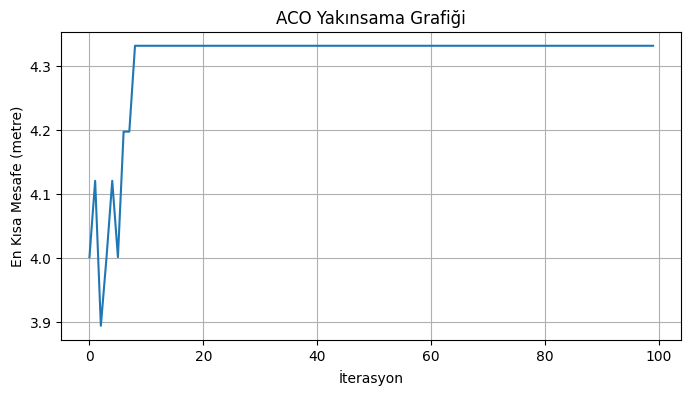

In [9]:
plt.figure(figsize=(8,4))
plt.plot(history)
plt.xlabel("İterasyon")
plt.ylabel("En Kısa Mesafe (metre)")
plt.title("ACO Yakınsama Grafiği")
plt.grid(True)
plt.show()


## Rota Görselleştirme


In [10]:
m = folium.Map(location=coords[0], zoom_start=11)

for idx in best_tour:
    folium.Marker(coords[idx], popup=CAMPUS_CONFIG[idx]["name"]).add_to(m)

for i in range(len(best_tour)):
    a = coords[best_tour[i]]
    b = coords[best_tour[(i+1)%len(best_tour)]]
    folium.PolyLine([a, b]).add_to(m)

m


## Mesafe Matrisi

Haversine formülü kullanılarak hesaplanan duraklar arası mesafeler
aşağıdaki tabloda kilometre cinsinden gösterilmiştir.


## Toplam Mesafe ve İyileştirme Oranı

ACO algoritmasının başlangıç çözümüne göre sağladığı
iyileştirme oranı hesaplanmıştır.


In [11]:
# Başlangıç çözümü: sıralı rota (0 → 1 → 2 → ... → 0)
initial_tour = list(range(len(CAMPUS_CONFIG)))

def tour_length(tour, dist):
    return sum(dist[tour[i]][tour[(i+1) % len(tour)]] for i in range(len(tour)))

initial_distance = tour_length(initial_tour, distance_matrix)

improvement_rate = ((initial_distance - best_length) / initial_distance) * 100

print(f"Başlangıç Toplam Mesafe: {initial_distance:.2f} km")
print(f"ACO ile Bulunan En Kısa Mesafe: {best_length:.2f} km")
print(f"İyileştirme Oranı: %{improvement_rate:.2f}")


Başlangıç Toplam Mesafe: 6.83 km
ACO ile Bulunan En Kısa Mesafe: 3.89 km
İyileştirme Oranı: %42.96
